# Credit Risk Analytics

This project involves an in-depth analysis of a loan dataset from a consumer finance company. It aim to identify patterns and factors that indicate whether a loan applicant is likely to default on the loan, enabling the lending company to make informed lending decisions and minimize credit loss.

## 1. Data Understanding

### a. Reading the Dataset and Understanding the General Structure

In [742]:
#Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [743]:
# Reading the dataset into a DataFrame
original_df = pd.read_csv("loan.csv")

C:\Users\shahp\AppData\Local\Temp\ipykernel_17148\4158003575.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv("loan.csv")


The warning is due to Column (47) have mixed data types. That need to be considered in Data cleaning process 

In [744]:
#Displaying first 5 rows of the dataframe
original_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Here we can see first 5 rows of dataset and can observe there are lots of missing values.<br>
That also need to be considered during data cleaning process

In [745]:
# Viewing summary of dataframe structure
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [746]:
# Shape of the dataframe
original_df.shape

(39717, 111)

In [747]:
# printing total number of rows and columns [i.e shape(rows, columns)]
print(f"Total number of columns: {original_df.shape[0]}")
print(f"Total number of rows: {original_df.shape[1]}")

Total number of columns: 39717
Total number of rows: 111


### b. Summary Statistics

In [748]:
# Describing the statistical data of the numerical data of the dataframe
original_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


Different statistics can be observed like (mean, median, min, max, etc)<br>
For few columns like loan_amnt, funded_amnt, it is quite understandable.<br>
But for few columns like num_tl_op_past_12m, pct_tl_nvr_dlq, etc it is non understandable due to irrelavant data. Perhaps that can be cleared in data cleaning process by different strategies like dropping null, outliers etc

### d. Missing values

Since we can see lots of null values in our previous observations, let's check the occurance of null values in the dataframe

In [749]:
#Calculating total number of missing values(null/NaN)
print("Total number of missing values in the DataFrame:", original_df.isnull().sum().sum())

Total number of missing values in the DataFrame: 2263364


In [750]:
#Calculating the number of columns with all null values
num_columns_with_all_null = original_df.isnull().all().sum()
print(f"Number of columns with all null values: {num_columns_with_all_null}")

# Calculating the number of columns with at least one null values
num_columns_with_missing_values = original_df.columns[original_df.isnull().any()].nunique()
print(f"Number of columns with at least one null values: {num_columns_with_missing_values}")

Number of columns with all null values: 54
Number of columns with at least one null values: 68


We have checked all the missing values in the dataset. <br>
- Columns with all null values must be dropped. <br>
- For columns with at least one null value, we should consider the threshold. <br>
    Columns with null values exceeding the threshold should be dropped, while those not exceeding the threshold should be considered for options such as imputation or removing rows with null values.

### e. Consistent Values

Let's see the columns where all the values are *zero/same* i.e. `consistent values`

In [751]:
# Checking the columns having all the values same
same_value_columns = original_df.columns[original_df.nunique() == 1]

for column in same_value_columns:
    value = original_df[column].iloc[0]
    print(f"Column: '{column}' --> {value}")

Column: 'pymnt_plan' --> n
Column: 'initial_list_status' --> f
Column: 'collections_12_mths_ex_med' --> 0.0
Column: 'policy_code' --> 1
Column: 'application_type' --> INDIVIDUAL
Column: 'acc_now_delinq' --> 0
Column: 'chargeoff_within_12_mths' --> 0.0
Column: 'delinq_amnt' --> 0
Column: 'tax_liens' --> 0.0


These columns can be droped since it doesn't have any use in our analysis because all the values are same. Doesn't make sense for the analysis

### e. Data Format and Types

In [752]:
# Finding the data types of all variables in dataframe
data_types = original_df.dtypes
data_types

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [753]:
original_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [754]:
data_types.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

We can see here there are three types of data types `int64`, `float64`, `O`(object)<br>

In [755]:
# Viewing few values and dtype of term column
print(original_df['term'].head())
print(original_df['term'].dtype)

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object
object


In [756]:
# Viewing few values and dtype of int_rate column
print(original_df['int_rate'].head())
print(original_df['int_rate'].dtype)

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object
object


Data types of few columns like term, int_rate, etc need to be changed.<br>
* For example: 
    * Need to change the variable type of term from object to int (36 month -> 36)
    * Need to change the variable type of int_rate from object to float (10.65% -> 10.65)

In [757]:
# Viewing the date column
date_columns = original_df.select_dtypes(include=['datetime64'])

date_column_names = date_columns.columns
print(date_column_names)

Index([], dtype='object')


Despite of our data having date variables, we were not able to view the date columns here. <br>
We have to consider the correction of format of the date in data cleaning process

### f. Outliers

In [758]:
# Defining few numerical columns in order to check outliers
numerical_columns = ['loan_amnt', 'annual_inc', 'funded_amnt', 'installment']

# Finding outliers of all four variables
for column in numerical_columns:
    # first quartile (Q1)
    Q1 = original_df[column].quantile(0.25)

    # third quartile (Q3)
    Q3 = original_df[column].quantile(0.75)

    # interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculating the lower bound and upper bound for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detecting outliers
    outliers = original_df[(original_df[column] < lower_bound) | (original_df[column] > upper_bound)]

    # Printing the column name and the number of outliers
    print(f"Outliers in {column}: {outliers.shape[0]}")


Outliers in loan_amnt: 1230
Outliers in annual_inc: 1843
Outliers in funded_amnt: 1038
Outliers in installment: 1245


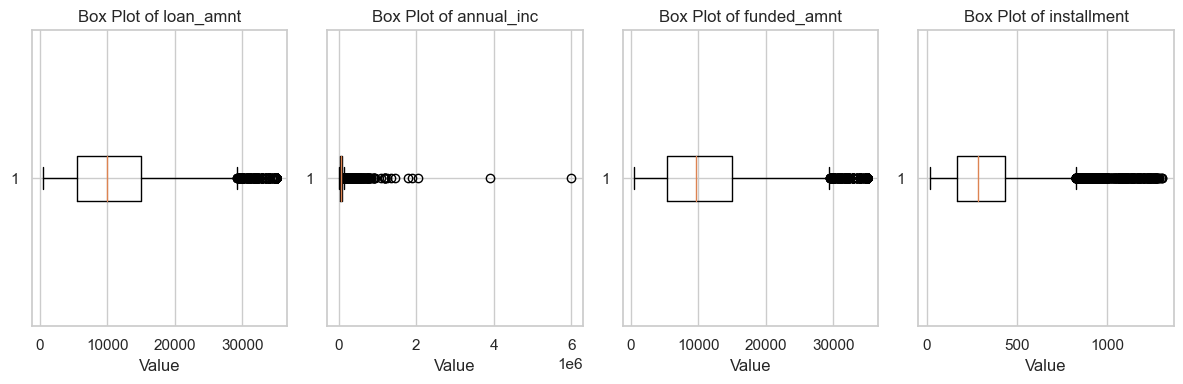

In [759]:
numerical_columns = ['loan_amnt', 'annual_inc', 'funded_amnt', 'installment']

# Creating a box plot for the those four varables
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(12, 4))

for i, column in enumerate(numerical_columns):
    axes[i].boxplot(original_df[column], vert=False)
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel('Value')

# Adjusting the layout
plt.tight_layout()
plt.show()


We can see lots of outliers are there that need to be removed. <br>
Outliers treatment should also be considered in data cleaning process.

### g. Variable meaning

In [760]:
# Print the names of all variables
original_df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

Here we can see few variables name doesn't reflect to the actual meaning and is difficult to understand. Every time we have to refer Data Dictionary. So, name of the columns should also be changed in further cleaning process <br>
(Not that necessary but just for readability while doing analysis)

### h. Data Distribution

In [761]:
# Selecting only numerical columns
numerical_columns = original_df.select_dtypes(include=['int64', 'float64'])

# Calculating skewness for each numerical column
skewness = numerical_columns.apply(lambda x: x.skew())

# Printing skewness values
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
id                            0.078808
member_id                    -0.212416
loan_amnt                     1.059317
funded_amnt                   1.081710
funded_amnt_inv               1.106213
                                ...   
tax_liens                     0.000000
tot_hi_cred_lim                    NaN
total_bal_ex_mort                  NaN
total_bc_limit                     NaN
total_il_high_credit_limit         NaN
Length: 87, dtype: float64


In [762]:
# Assuming 'skewness' is a Series containing skewness values
normally_distributed = sum((-0.5 <= skewness) & (skewness <= 0.5))
left_skewed = sum(skewness < -0.5)
right_skewed = sum(skewness > 0.5)

print("Normally Distributed Variables:", normally_distributed)
print("Left-Skewed Variables:", left_skewed)
print("Right-Skewed Variables:", right_skewed)

Normally Distributed Variables: 10
Left-Skewed Variables: 1
Right-Skewed Variables: 22


Among 111 variables in dataset only skewness of 33 has been calculated. <br>
It either means rest other columns are non numerical variables OR the columns have all value missing.<br>
And, it can be seen that dataset are not at all distributed normally. So, it need to be cleaned in various way like, dropping missing values, removing outliers, changing datatypes of the variables

### i. Summary

a. **Reading Dataset and understanding general structure of the dataset**:
   - We successfully loaded the dataset into `original_df` and viewed the general structure of the dataset, including its shape, number of columns and rows, etc.

b. **Summary Statistics**:
   - Viewing summary statistics (mean, median, max, min, etc.) for numerical data helped us understand the central tendencies and data spread, enabling us to consider further steps.

c. **Missing Values**:
   - We addressed missing values by considering two scenarios:
     - Columns with all null values: Should be dropped in cleaning process.
     - Columns with at least one null value: Under some threshold:
       - Columns with null values exceeding the threshold should be dropped.
       - For columns with null values below the threshold, we should consider options such as imputation or removing rows with null values.

d. **Consistent Values**:
   - Columns where all values are zero/same should be removed in data cleaning process.

e. **Data Format and Types**:
   - We identified issues related to data format, including string values and dates, which needed transformation during the data cleaning process.
   - Additionally, we recognized the need to change the data types of specific variables.

f. **Handling Outliers**:
   - Numerous outliers can be observed in the variables. Those outliers should be treated in data cleaning process

g. **Variable Names**:
   - Some variable names were found to be unclear or not reflective of their actual meaning, highlighting the need for renaming during the cleaning process. (Not optional, just for the readibility)

h. **Data Distribution**:
   - Observing the data distribution, we noted that most variables were not normally distributed. So, we should consider various data cleaning approaches, including dropping missing values, removing outliers, changing variable data types, and more.


## 2. Data Cleaning and Manipulation

Before starting a cleaning process lets keep the backup of original data frame to `original_df` and copy the dataframe to `df` and we will be using that for further

In [763]:
df = original_df.copy()

After understanding the data, we have concluded that our DataFrame has a lot to be cleaned

### a. Dropping non essential columns (missing values and consistent values)

Since we saw there are two types of columns having missing values `all values are missing` and `at least one value is missing`

In [764]:
df.shape[1] #total number of column

111

Lets make a threshold `0.3` and try to remove all the columns having more than 30% null values

In [765]:
# Defining a threshold for the maximum allowable missing values
max_missing_threshold = 0.3

# Calculating the percentage of missing values in each column
columns_with_missing_values = df.isnull().mean()

# Dropping columns with missing values exceeding the threshold
columns_to_drop = columns_with_missing_values[columns_with_missing_values > max_missing_threshold].index

# Dropping the identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [766]:
df.shape[1] # total number of column after dropping null values

53

111 - 53 = 58 columns were dropped

In [767]:
# Counting total number of missing values in the DataFrame
print(f"Total number of missing values(original_df): {original_df.isna().sum().sum()}")
print(f"Total number of missing values(df): {df.isna().sum().sum()}")

Total number of missing values(original_df): 2263364
Total number of missing values(df): 4516


We were able to drop huge amount of missing values.<br>
But still we do have 4516 missing values

In [768]:
df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Before deleting missing values lets delete some non essential columns <br>
Let's delete columns with consistent values

In [769]:
df_backup = df.copy()

In [770]:
# Defining a threshold for the maximum allowable zero values
max_zero_threshold = 1  # This threshold is set to 1, meaning all zeros

# Calculating the sum of values equal to zero in each column
columns_with_zero_values = (df == 0).sum()

# Finding the columns to drop
columns_to_drop = columns_with_zero_values[columns_with_zero_values > max_zero_threshold].index

print(f"Number of columns with all values zero: {len(columns_to_drop)}")

Number of columns with all values zero: 22


Let's delete all those columns

In [771]:
# Dropping those columns
df = df.drop(columns=columns_to_drop)

In [772]:
df.shape[1]

31

Total number of current columns is 31

In [773]:
# Viewing the total number of columns with the same values
num_columns_same_values = (df.nunique() == 1).sum()
print(f"Number of columns with all values the same: {num_columns_same_values}")

Number of columns with all values the same: 4


Let's delete all those columns

In [774]:
df = df.loc[:, df.nunique() > 1]

In [775]:
df.shape[1]

27

Now, we have 27 columns left after deleting non essential columns

In [776]:
df1 = df.copy()

### b. Dropping non Essential columns

After understanding our data we could conclude that there are some columns that need to be delete apart from columns with missing values, zero values and same values <br>
Let's have a look into 

In [777]:
df.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,...,purpose,title,zip_code,addr_state,earliest_cr_line,open_acc,revol_util,total_acc,last_pymnt_d,last_credit_pull_d
0,1077501,1296599,5000,5000,36 months,10.65%,162.87,B,B2,NaN,...,credit_card,Computer,860xx,AZ,Jan-85,3,83.70%,9,Jan-15,May-16
1,1077430,1314167,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,...,car,bike,309xx,GA,Apr-99,3,9.40%,4,Apr-13,Sep-13
2,1077175,1313524,2400,2400,36 months,15.96%,84.33,C,C5,NaN,...,small_business,real estate business,606xx,IL,Nov-01,2,98.50%,10,Jun-14,May-16
3,1076863,1277178,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,other,personel,917xx,CA,Feb-96,10,21%,37,Jan-15,Apr-16
4,1075358,1311748,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,...,other,Personal,972xx,OR,Jan-96,15,53.90%,38,May-16,May-16


In [778]:
df.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'open_acc',
 'revol_util',
 'total_acc',
 'last_pymnt_d',
 'last_credit_pull_d']

`id` is non esssential <br>
`member_id` is not usually essential. But, lets keep this unique id just in case in future if we want to use other columns which is not in current dataframe, then using id we can map the original_df to the df <br>
 `loan_amt`, `funded_amnt`, `term`, `int_rate`, `installment`, `grade`, `sub_grade` are essential columns <br>
 `emp_title`, `emp_length` is not that essential <br>
 `home_ownership`, `anual_inc`, `verification_status` are essential <br>
 `issue_d` is non essential

In [779]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

`loan_status` is essential column but the rows with 'Current' is non essential. Will do row part later <br>
`url`, `desc` are non essential <br>
`purpose` is essential

In [780]:
df['title'].head()

0                Computer
1                    bike
2    real estate business
3                personel
4                Personal
Name: title, dtype: object

`title` is non essential since it consists of long string and will be difficult for analysis (`purpose` somewhat include the meaning of `title`)<br>
`zip_code`, `addr_state`, `earliest_cr_line` are non essential <br>
`open_acc`, `revol_util`, `total_acc`, `initial_list_status` can be essential <br>
`last_pymnt_d` is non essential <br>
`last_credit_pull_d` is essential

In [781]:
df.shape[1]

27

Now, lets delete all the non essential columns

In [782]:
# Columns to be deleted
columns_to_delete = ['id', 'emp_title', 'emp_length', 'issue_d', 
                     'url', 'title', 'zip_code', 'addr_state', 
                     'earliest_cr_line', 'last_pymnt_d']

# Dropping the specified columns
df.drop(columns=columns_to_delete, inplace=True)

In [783]:
df.shape[1] # total number of columns left after deleting non essential columns

17

In [784]:
df.columns.tolist()

['member_id',
 'loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'open_acc',
 'revol_util',
 'total_acc',
 'last_credit_pull_d']

In [785]:
df.isnull().sum().sum() # total number of remaining missing data

52

Finally we have dropped those non essential columns and now we are left with 18 columns <br>
But still there are 52 missing values

In [786]:
# Filter for columns with null values
columns_with_null_values = null_value_counts[null_value_counts > 0]

# Print the column names with null values
print("Columns with null values:")
print(columns_with_null_values.index.tolist())

Columns with null values:
['revol_util', 'last_credit_pull_d']


So, we can see these columns have missing values

Its time for imputation. But, before performing imputation we have to manage data format and types because all the dtypes of variables should be correct to perform imputation

### Standardizing the data

In [787]:
df.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,open_acc,revol_util,total_acc,last_credit_pull_d
0,1296599,5000,5000,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,credit_card,3,83.70%,9,May-16
1,1314167,2500,2500,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,3,9.40%,4,Sep-13
2,1313524,2400,2400,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,small_business,2,98.50%,10,May-16
3,1277178,10000,10000,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,other,10,21%,37,Apr-16
4,1311748,3000,3000,60 months,12.69%,67.79,B,B5,RENT,80000.0,Source Verified,Current,other,15,53.90%,38,May-16


In [788]:
df.dtypes

member_id                int64
loan_amnt                int64
funded_amnt              int64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
open_acc                 int64
revol_util              object
total_acc                int64
last_credit_pull_d      object
dtype: object

In [789]:
# Converting 'term' to int64
df['term'] = df['term'].str.extract('(\d+)').astype('int64')

# Converting 'int_rate' to float
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)

# Converting 'grade' and 'sub_grade' to category
df['grade'] = df['grade'].astype('category')
df['sub_grade'] = df['sub_grade'].astype('category')

# Converting 'home_ownership' to category
df['home_ownership'] = df['home_ownership'].astype('category')

# Converting 'verification_status' to category
df['verification_status'] = df['verification_status'].astype('category')

# Converting 'loan_status' to category
df['loan_status'] = df['loan_status'].astype('category')

# Converting 'purpose' to category
df['purpose'] = df['purpose'].astype('category')

# Converting 'revol_util' to float
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float')

# Converting 'last_credit_pull_d' to datetime
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')


In [790]:
df.dtypes

member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
term                            int64
int_rate                      float64
installment                   float64
grade                        category
sub_grade                    category
home_ownership               category
annual_inc                    float64
verification_status          category
loan_status                  category
purpose                      category
open_acc                        int64
revol_util                    float64
total_acc                       int64
last_credit_pull_d     datetime64[ns]
dtype: object

#### Let's perform imputation on revol_util colum

In [791]:
mean_revol_util = df['revol_util'].mean()
df['revol_util'].fillna(mean_revol_util, inplace=True)  # Or median_revol_util

In [792]:
df.isnull().sum().sum() # total number of remaining missing data

2

After imputing missing value in `revol_util` only 2 missing value left <br>
It means only last_credit_pull_d is left with 2 missing value <br>
Since, last_credit_pull_d is datetime type, it might be little incorrect to impute missing values for it <br>
Instead we can drop those two rows having missing values

In [793]:
df.shape

(39717, 17)

In [794]:
# Dropping rows with missing values
df.dropna(inplace=True)

In [795]:
df.shape

(39715, 17)

In [796]:
print(f"Total number of missing values in dataframe: {df.isna().sum().sum()}")

Total number of missing values in dataframe: 0


In [797]:
df.describe()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,annual_inc,open_acc,revol_util,total_acc
count,3.971500e+04,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000,3.971500e+04,39715.000000,39715.000000,39715.000000
mean,8.504831e+05,11219.857736,10948.113433,42.418331,12.021323,324.573359,6.896696e+04,9.294599,48.832486,22.088783
std,2.656635e+05,7456.616797,7187.184321,10.622985,3.724835,208.873382,6.379471e+04,4.400298,28.314156,11.401561
min,7.069900e+04,500.000000,500.000000,36.000000,5.420000,15.690000,4.000000e+03,2.000000,0.000000,2.000000
25%,6.667840e+05,5500.000000,5400.000000,36.000000,9.250000,167.035000,4.040200e+04,6.000000,25.500000,13.000000
50%,8.508290e+05,10000.000000,9600.000000,36.000000,11.860000,280.240000,5.900000e+04,9.000000,49.200000,20.000000
75%,1.047345e+06,15000.000000,15000.000000,60.000000,14.590000,430.780000,8.229800e+04,12.000000,72.300000,29.000000
max,1.314167e+06,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,44.000000,99.900000,90.000000


#### Cleaning Row

In [798]:
df.columns.tolist()

['member_id',
 'loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'open_acc',
 'revol_util',
 'total_acc',
 'last_credit_pull_d']

In [799]:
df.shape

(39715, 17)

In [800]:
df['loan_status'].unique()

['Fully Paid', 'Charged Off', 'Current']
Categories (3, object): ['Charged Off', 'Current', 'Fully Paid']

We don't need 'Current' because they are neither defaulter nor fully paid customer and they won't be used for our analysis

In [801]:
# Keeping only 'Fully Paid' and 'Charged Off' loan_status
df = df[df['loan_status'] != 'Current']
df['loan_status'].unique()

['Fully Paid', 'Charged Off']
Categories (3, object): ['Charged Off', 'Current', 'Fully Paid']

In [802]:
df.shape

(38575, 17)

### Outliers treatment

In [803]:
# Setting some of the global settings
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))

<Axes: >

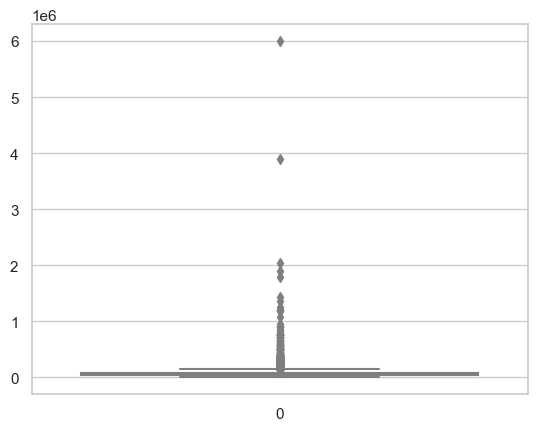

In [804]:
# Ploting boxplot for annual_inc
sns.boxplot(df['annual_inc'])

#### Clearly indincating the presence of outliers.
- So, Removing them.
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- So, considering threshold for removing outliers as 0.95

In [805]:
quantile_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58852.56
0.75     82000.00
0.90    115000.00
0.95    140004.00
0.97    165000.00
0.98    187000.00
0.99    234156.00
Name: annual_inc, dtype: float64

In [806]:
per_95_annual_inc = df['annual_inc'].quantile(0.95)
loan = df[df.annual_inc <= per_95_annual_inc]

<Axes: >

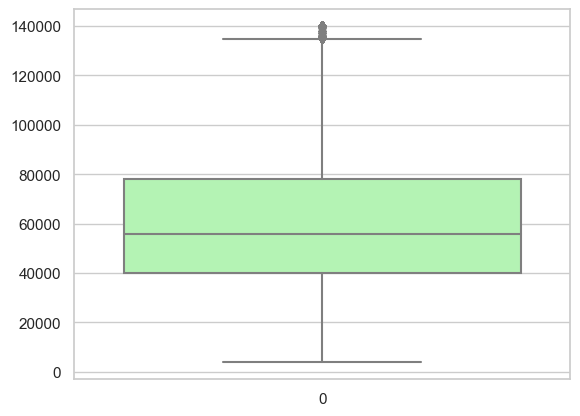

In [807]:
sns.boxplot(loan['annual_inc'])

#### Now the "annual_inc" data looks good and proceeding next. Let's analyze other numerical variables which could possibly have outliers.
- loan_amnt

<Axes: >

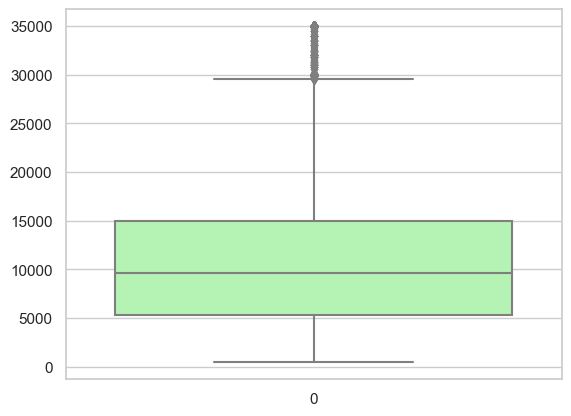

In [808]:
sns.boxplot(df.loan_amnt)

In [809]:
df.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    21600.0
0.950    25000.0
0.970    28000.0
0.975    30000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

Outliers treatment seems to be good. And we are good to go for EDA

In [810]:
df1 = df.copy()

## 3. Data analysis

In [811]:
df['loan_status_num'] = df['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1 if x == 'Charged Off' else -1)

In [812]:
df.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,open_acc,revol_util,total_acc,last_credit_pull_d,loan_status_num
0,1296599,5000,5000,36,10.65,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,credit_card,3,83.7,9,2016-05-01,0
1,1314167,2500,2500,60,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,3,9.4,4,2013-09-01,1
2,1313524,2400,2400,36,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,small_business,2,98.5,10,2016-05-01,0
3,1277178,10000,10000,36,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,other,10,21.0,37,2016-04-01,0
5,1311441,5000,5000,36,7.90,156.46,A,A4,RENT,36000.0,Source Verified,Fully Paid,wedding,9,28.3,12,2016-01-01,0


Before starting Analysis lets drop `member_id`

In [813]:
df = df.drop('member_id', axis=1)

In [814]:
df[df.duplicated()].count()

loan_amnt              0
funded_amnt            0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
open_acc               0
revol_util             0
total_acc              0
last_credit_pull_d     0
loan_status_num        0
dtype: int64

No any data redundancy after deleting `member_id` <br>
So we will now proceed with the analysis

In [815]:
df.columns.tolist()

['loan_amnt',
 'funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'open_acc',
 'revol_util',
 'total_acc',
 'last_credit_pull_d',
 'loan_status_num']

### a. Univariate Analysis

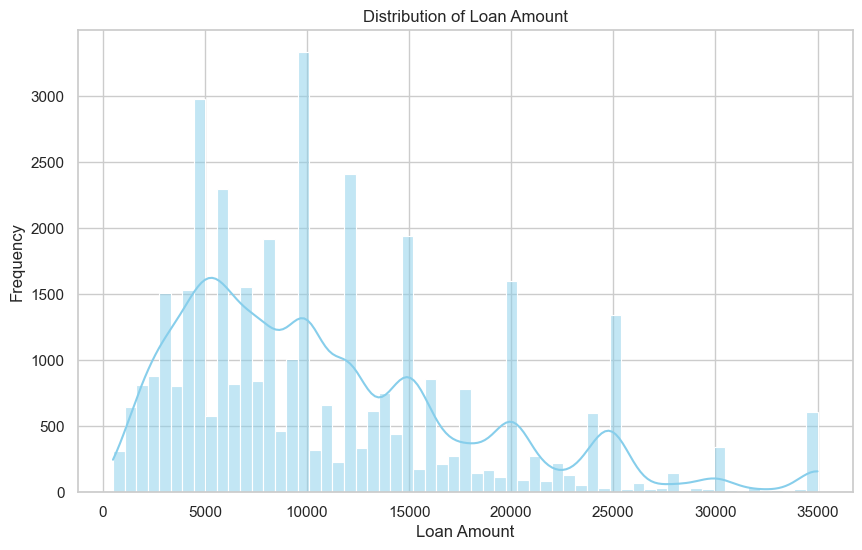

In [816]:
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], kde=True, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [817]:
loan_amnt_stats = df['loan_amnt'].describe()
print(loan_amnt_stats)

count    38575.000000
mean     11047.442644
std       7348.389581
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


#### Looking at the histogram and the stats data we can come to the following conclusion:
- Many customers has taken debt between 5000 to 15000, since histogram has more frequency in that range. And also the mean falls in this range
- 25% of customer took loan of 5300
- 50% of customer took loan of 9600
- 75% of customer took loan of 15000

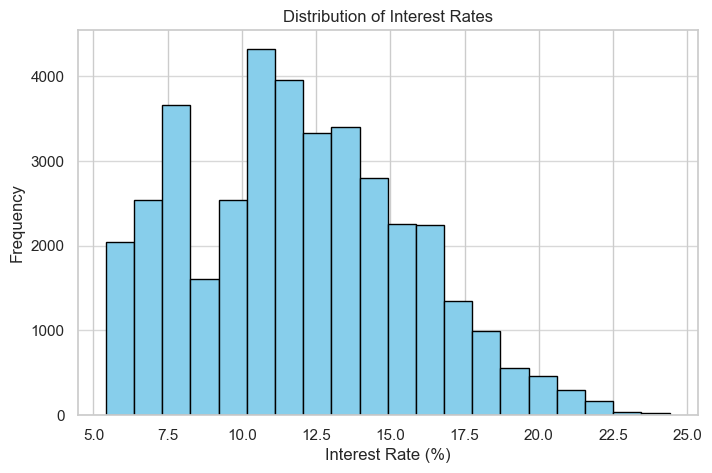

In [818]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['int_rate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()


In [819]:
df['int_rate'].mean()

11.932364484769929

#### Interest rate stats concludes:
- For most of the users the interest rate was around 12% since mean is 11.9

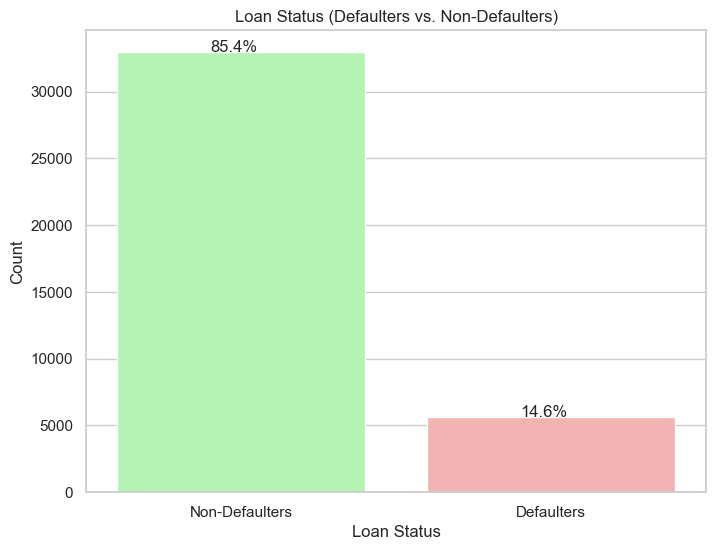

In [820]:
import matplotlib.pyplot as plt

# Map labels to 0 and 1
label_map = {0: "Non-Defaulters", 1: "Defaulters"}
df['loan_status_label'] = df['loan_status_num'].map(label_map)

# Create the bar diagram with percentages
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='loan_status_label', palette=colors)
plt.title("Loan Status (Defaulters vs. Non-Defaulters)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
total = len(df['loan_status_label'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 50
    ax.annotate(percentage, (x, y), fontsize=12)
plt.show()


#### Loan Status concludes:
- Almost 15 % of the customers were defaulter and 85% weren't

In [821]:
df['loan_status_num'].dtype

CategoricalDtype(categories=[1, -1, 0], ordered=False)

### b. Segmented Univariate Analysis

<Figure size 1000x600 with 0 Axes>

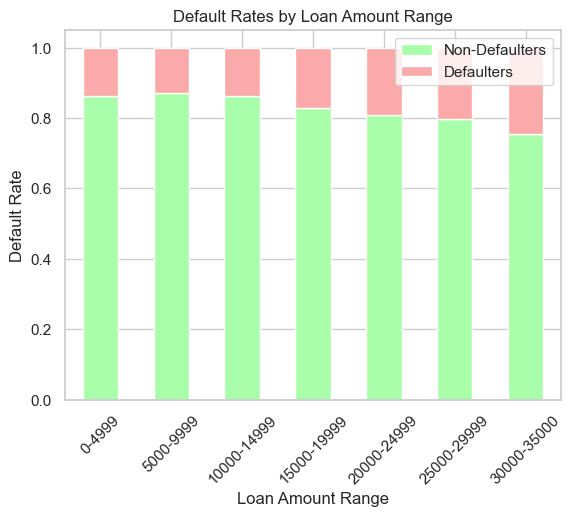

In [822]:
# Define the loan amount ranges
loan_ranges = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]

# Create labels for the loan amount ranges
labels = ['0-4999', '5000-9999', '10000-14999', '15000-19999', '20000-24999', '25000-29999', '30000-35000']

# Create a new column 'loan_amnt_range' to represent the loan amount ranges
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins=loan_ranges, labels=labels)

# Calculate the default rates for each loan amount range based on counts
default_rates = df.groupby('loan_amnt_range')['loan_status_num'].value_counts(normalize=True).unstack().fillna(0)

# Plot a bar chart to visualize default rates
plt.figure(figsize=(10, 6))
default_rates.plot(kind='bar', stacked=True)
plt.title('Default Rates by Loan Amount Range')
plt.xlabel('Loan Amount Range')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.legend(['Non-Defaulters', 'Defaulters'])
plt.show()

#### Default Rates by Loan Amount Range concludes:
- The customer taking high number of loan are more likely to default